## Loading Cifar10

In [1]:
from keras.datasets import cifar10
(x_train,_),(x_test,_)=cifar10.load_data()

### Checking dimension

In [2]:
print(x_train.shape)

(50000, 32, 32, 3)


### Image pre processing

In [2]:
def pre_process(X):
    X = X/255.0
    X = X.reshape((len(X), 3072))
    return X

x_train  =  pre_process(x_train)
x_test  =  pre_process(x_test)

print("X_train", x_train.shape)
print("X_test", x_test.shape)

X_train (50000, 3072)
X_test (10000, 3072)


### Visualization the training images 

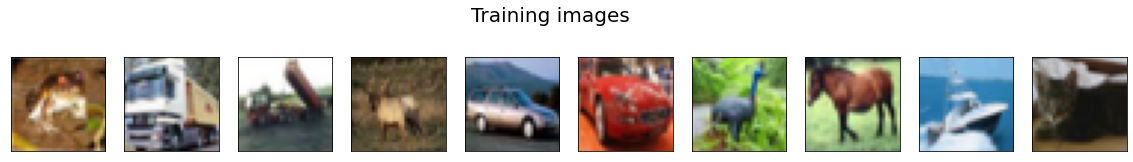

In [3]:
import matplotlib.pyplot as plt
def show_data(X, n=10, height=32, width=32,depth=3 , title=""):
    plt.figure(figsize=(20, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width,depth)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

show_data(x_train,title="Training images")

### Building the Stacked Autoencoder

In [4]:
from keras.layers import Input, Dense
from keras.models import Model

### Building the layers 


- Input layer          = 3072 neurons
- Hidden layer_1       =  768 neurons
- Hidden layer_2       =  192 neurons
- Code layer           =   48 neurons
- Hidden layer_3       =  192 neurons
- Hidden layer_4       =  768 neurons
- Output layer         = 3072 neurons

In [5]:
# encoder
input_layer = Input(shape=(3072,), name="INPUT")
hidden_layer_1 = Dense(768, activation='relu', name="HIDDEN_1")(input_layer)
hidden_layer_2 = Dense(192, activation='relu', name="HIDDEN_2")(hidden_layer_1)

# code
code_layer = Dense(48, activation='relu', name="CODE")(hidden_layer_2)

# decoder
hidden_layer_3 = Dense(192, activation='relu', name="HIDDEN_3")(code_layer)
hidden_layer_4 = Dense(768, activation='relu', name="HIDDEN_4")(hidden_layer_3 )
output_layer = Dense(3072, activation='sigmoid', name="OUTPUT")(hidden_layer_4)

### Compiling the layers 

In [6]:
stacked_autoencoder=Model(input_layer, output_layer)
stacked_autoencoder.compile(optimizer="Adam",loss="binary_crossentropy")
stacked_autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 3072)]            0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 768)               2360064   
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 192)               147648    
_________________________________________________________________
CODE (Dense)                 (None, 48)                9264      
_________________________________________________________________
HIDDEN_3 (Dense)             (None, 192)               9408      
_________________________________________________________________
HIDDEN_4 (Dense)             (None, 768)               148224    
_________________________________________________________________
OUTPUT (Dense)               (None, 3072)              236236

### Fitting the model

In [7]:
stacked_autoencoder.fit(x_train, x_train, epochs=100,batch_size=256,validation_data=(x_test, x_test))

Epoch 1/100
196/196 [==============================] - 2s 9ms/step - loss: 0.6605 - val_loss: 0.6126
Epoch 2/100
196/196 [==============================] - 1s 7ms/step - loss: 0.6078 - val_loss: 0.6032
Epoch 3/100
196/196 [==============================] - 1s 7ms/step - loss: 0.6008 - val_loss: 0.5992
Epoch 4/100
196/196 [==============================] - 1s 7ms/step - loss: 0.5973 - val_loss: 0.5958
Epoch 5/100
196/196 [==============================] - 1s 7ms/step - loss: 0.5946 - val_loss: 0.5947
Epoch 6/100
196/196 [==============================] - 1s 7ms/step - loss: 0.5935 - val_loss: 0.5946
Epoch 7/100
196/196 [==============================] - 1s 7ms/step - loss: 0.5937 - val_loss: 0.5934
Epoch 8/100
196/196 [==============================] - 1s 7ms/step - loss: 0.5912 - val_loss: 0.5910
Epoch 9/100
196/196 [==============================] - 1s 7ms/step - loss: 0.5900 - val_loss: 0.5899
Epoch 10/100
196/196 [==============================] - 1s 7ms/step - loss: 0.5886 - val_lo

### Predicting 

In [8]:
decoded_data = stacked_autoencoder.predict(x_test)

### Visualization of both original and decoded data 

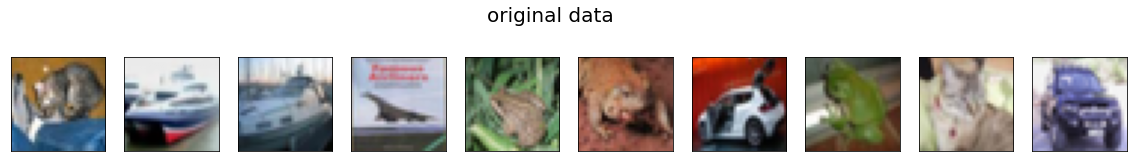

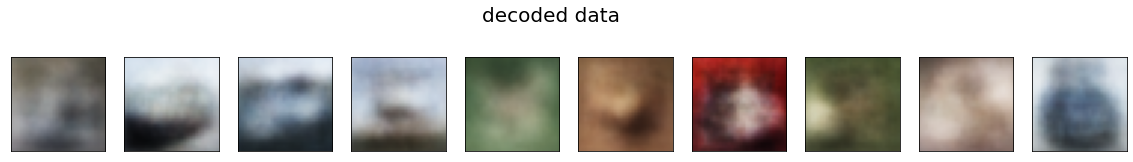

In [9]:
show_data(x_test, title="original data")
show_data(decoded_data, title="decoded data")